<a href="https://colab.research.google.com/github/Ayush-mishra-0-0/dav-project/blob/main/Modelling_twitter_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First we are try to build model using tensorlfow-keras

In [85]:
import pandas as pd
import tensorflow as tf
import tensorflow as tf
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

df= pd.read_csv("Twitter-label.csv")
df.head()

,Unnamed: 0,text,label
0,0,The #NewDelhi Declaration’s #policy commitment...,Positive
1,1,As #India prepares to end its #G20 presidency ...,Negative criticism
2,2,Adding weight to #P20’s representativeness is ...,Positive
3,3,"The Secretary-General, Ambassador Maria Laura ...",Positive
4,4,Under #India’s leadership during the #G20 pres...,Positive


#### Changing the label column from string to numbers. This process is encoding.

In [78]:
df['label'] = df['label'].replace({
    'Positive': 0,
    'Negative': 1,
    'Positive criticism': 2,
    'Negative criticism': 3
})

In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.20, random_state=2)


In [80]:
# Use LabelEncoder to convert string labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [81]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)


In [82]:
# Pad sequences to ensure they have the same length
max_len = max(len(seq) for seq in X_train_sequences + X_test_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len)

In [101]:
# Build the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=16, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train_padded, y_train_encoded, validation_data=(X_test_padded, y_test_encoded), epochs=6, verbose=1)


Epoch 1/6
14/14 [==============================] - 5s 202ms/step - loss: 1.3018 - accuracy: 0.5107 - val_loss: 1.1482 - val_accuracy: 0.6095
Epoch 2/6
14/14 [==============================] - 1s 91ms/step - loss: 1.0412 - accuracy: 0.5585 - val_loss: 1.0272 - val_accuracy: 0.6095
Epoch 3/6
14/14 [==============================] - 2s 110ms/step - loss: 0.9160 - accuracy: 0.5847 - val_loss: 0.9599 - val_accuracy: 0.6571
Epoch 4/6
14/14 [==============================] - 1s 93ms/step - loss: 0.8160 - accuracy: 0.6850 - val_loss: 0.9118 - val_accuracy: 0.7333
Epoch 5/6
14/14 [==============================] - 1s 72ms/step - loss: 0.6737 - accuracy: 0.8115 - val_loss: 0.8285 - val_accuracy: 0.7429
Epoch 6/6
14/14 [==============================] - 1s 104ms/step - loss: 0.5310 - accuracy: 0.8687 - val_loss: 0.7658 - val_accuracy: 0.7429


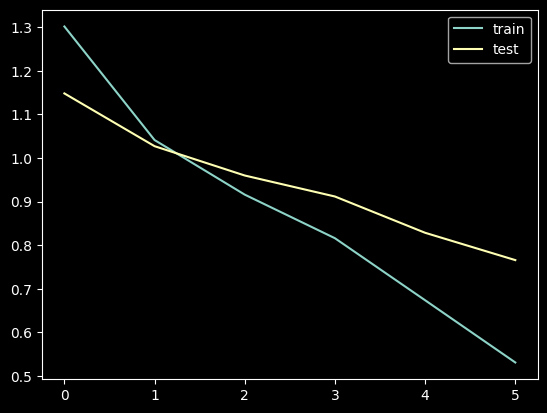

In [102]:
plt.style.use('dark_background')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()